# Python处理地理信息
## Contour:等值线

In [ ]:
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

meteo_file = '/home/data/nc/1948/slp.mon.mean.nc'
fh = Dataset('slp.mon.mean.nc')

# 获取每个变量的值
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
slp = fh.variables['slp'][:]
slp_units = fh.variables['slp'].units


# 经纬度平均值
lon_0 = lons.mean()
lat_0 = lats.mean()
# 控制地图的范围
m = Basemap(llcrnrlat=15,urcrnrlat=55,llcrnrlon=70,urcrnrlon=140)
m = Basemap(lat_0=lat_0, lon_0=lon_0)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
# 绘制具体的时间层，这里是具体的第一层时间
slp_0 = slp[0:1:, ::, ::]
# 核心的画图api
cs = m.pcolor(xi, yi, np.squeeze(slp_0))

# Add Grid Lines
# 绘制经纬线

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries绘制陆地、国家和州界线
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(slp_units)

# Add Title
plt.title('Sea Surface Pressure')
plt.show()

fh.close()

# vector：矢量图

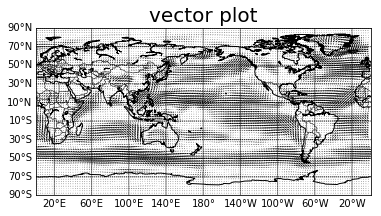

In [21]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

obju=nc.Dataset('uwnd.mon.mean.nc')
objv=nc.Dataset('vwnd.mon.mean.nc')



u=obju.variables['uwnd'][0,0,:,:]
v=objv.variables['vwnd'][0,0,:,:]
lats=obju.variables['lat'][:]
lons=obju.variables['lon'][:]


m=Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


x,y=m(lons,lats)

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)
# Add Coastlines, States, and Country Boundaries绘制陆地、国家和州界线
m.drawcoastlines()
#m.drawstates()
m.drawcountries()
#m.drawlsmask()
# curve=m.contour(lons,lats,u,colors='k')
# shade=m.contourf(lons,lats,u)
# m.colorbar(shade)
# plt.clabel(curve,fmt='%1.0f')
# print help(plt.quiver)
wind=m.quiver(lons,lats,u,v,width=0.002,headwidth=2,headlength=4)
plt.title('vector plot',size=20)
plt.show()

# Shade：阴影图

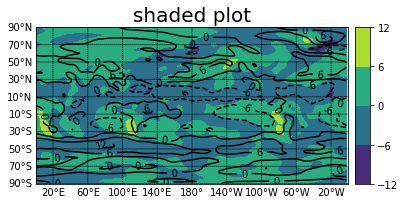

In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
obju=nc.Dataset('uwnd.mon.mean.nc')
objv=nc.Dataset('vwnd.mon.mean.nc')



u=obju.variables['uwnd'][0,0,:,:]
v=objv.variables['vwnd'][0,0,:,:]
lats=obju.variables['lat'][:]
lons=obju.variables['lon'][:]


m=Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)
# 根据数据的经纬度生成对应的地理网格点
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


x,y=m(lons,lats)

m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)

m.drawlsmask()
levels = [-12,-6,0,6,12]
curve=m.contour(lon,lat,u,colors='k',levels = levels)
shade=m.contourf(lon,lat,v,levels = levels)
m.colorbar(shade)
plt.clabel(curve,fmt='%1.0f')
# print help(plt.quiver)
# wind=m.quiver(lons,lats,u,v,width=0.002,headwidth=2,headlength=4)
plt.title('shaded plot',size=20)
plt.show()

## 用ncl的调色板

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


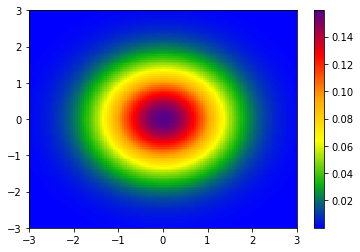

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cmaps
import numpy as np

x = y = np.arange(-3.0, 3.01, 0.05)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#print(type(cmaps.BlGrYeOrReVi200))

plt.pcolormesh(X,Y,Z1,cmap=cmaps.BlGrYeOrReVi200)
plt.colorbar()
plt.show()

### Python绘制hdf格式的文件

In [ ]:
# 先导入所需库
import numpy.ma as nm
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.basemap import Basemap
from pyhdf.SD import SD

hdf = SD('LISOTD_LRMTS_V2.3.2014.hdf')
# 获取数据
data = hdf.select('LRMTS_COM_FR').get()
lat = hdf.select('Latitude').get()
lon = hdf.select('Longitude').get()
datas = np.sum(data, axis = 2)  # 求和

mask_datas = nm.masked_values(datas, 0) # 掩膜 datas 中等于 0 的值

# 自定义 colormap
cmp = ['#A8A8A8', '#812089', '#A817B0', '#F098EF', '#010090',
     '#6868C8', '#C8C8E0', '#1FA021', '#70D06F', '#B0F1B1',
     '#DFE000', '#E89008', '#C78121', '#C0712F', '#D00000',
     '#A00000', '#383838', '#A8A8A8']
cmaps = colors.ListedColormap(cmp)
# 设置不等间距 colorbar
levels = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
norm = colors.BoundaryNorm(levels, cmaps.N)

# 绘图
fig,ax = plt.subplots()

m = Basemap(projection='mill',\
           rsphere=6371200.,resolution='l',area_thresh=10000)
m.drawcoastlines() # 绘制海岸线
m.drawstates()    # 绘制美国州界
m.drawcountries()  # 绘制国界
# 绘制纬度线
parallels = np.arange(-90.,91,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# 绘制经度线
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# 网格化经纬度，并进行投影转换坐标            
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

# 绘制等值线
con = m.contourf(x, y, mask_datas, cmap = cmaps, norm = norm, levels = levels, spacing = 'uniform')
# 添加标题
ax.set_title('Flash Density')

cax = m.colorbar(con, cmap = cmaps, ax = ax, spacing = 'uniform')
cax.set_ticks(levels)
cax.ax.tick_params(direction = 'in')
cax.set_label('flash density (fl/km^2)')

plt.show()

In [12]:
from mpl_toolkits.basemap import Basemap as m
print(dir(m))
print('*'*150)
print('*'*150)
print('*'*150)


['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ax_plt_from_kw', '_check_ax', '_cliplimb', '_getmapboundary', '_readboundarydata', '_restore_hold', '_save_use_hold', 'arcgisimage', 'barbs', 'bluemarble', 'colorbar', 'contour', 'contourf', 'drawcoastlines', 'drawcounties', 'drawcountries', 'drawgreatcircle', 'drawlsmask', 'drawmapboundary', 'drawmapscale', 'drawmeridians', 'drawparallels', 'drawrivers', 'drawstates', 'etopo', 'fillcontinents', 'gcpoints', 'hexbin', 'imshow', 'is_land', 'makegrid', 'nightshade', 'pcolor', 'pcolormesh', 'plot', 'quiver', 'readshapefile', 'rotate_vector', 'scatter', 'set_axes_limits', 'shadedrelief', 'shiftdata', 'streamplot', 'tissot', 'transform_sca

## 一个利用cmps、basemap绘制的完整的contour


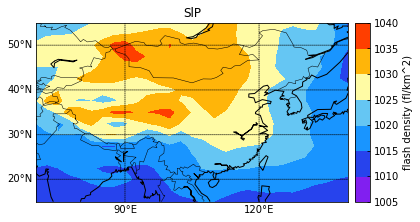

In [10]:
# 先导入所需库
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


from matplotlib import cm, colors

import cmaps

### NCL自定义的调色版
cmap_color=cmaps.ncl_default 


#print(type(index))
# 



# 获取数据

meteo_file = '/home/data/nc/1948/slp.mon.mean.nc'
fh = Dataset('slp.mon.mean.nc')#(meteo_file, mode='r')

# 获取每个变量的值
lon = fh.variables['lon'][:]
lat = fh.variables['lat'][:]
slp = fh.variables['slp'][:]
slp_units = fh.variables['slp'].units

slp_0 = slp[0, ::, ::]


# # 自定义 colormap
# cmp = ['#A8A8A8', '#812089', '#A817B0', '#F098EF', '#010090',
#      '#6868C8', '#C8C8E0', '#1FA021', '#70D06F', '#B0F1B1',
#      '#DFE000', '#E89008', '#C78121', '#C0712F', '#D00000',
#      '#A00000', '#383838', '#A8A8A8']

# cmaps = colors.ListedColormap(cmp)

# ## 定义颜色版－－插值法

# colorslist = ['gray','aqua','#0343df','lime']
# cmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)


# 设置不等间距 colorbar
levels = [1005,1010,1015,1020,1025,1030,1035,1040]
#norm = colors.BoundaryNorm(levels, cmaps.N)
norm = colors.BoundaryNorm(levels, 200)

# 绘图
fig,ax = plt.subplots()
m = Basemap(llcrnrlat=15,urcrnrlat=55,llcrnrlon=70,urcrnrlon=140)

m.drawcoastlines() # 绘制海岸线
m.drawstates()    # 绘制美国州界
m.drawcountries()  # 绘制国界
# 绘制纬度线
parallels = np.arange(-90.,91,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# 绘制经度线
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# 网格化经纬度，并进行投影转换坐标            
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

# 绘制等值线
#con = m.contourf(x, y, slp_0, cmap = cmaps, norm = norm, levels = levels, spacing = 'uniform')

# 调色板的使用　默认时ncl的调色板
con = m.contourf(x, y, slp_0, cmap = cmap_color, norm = norm, levels = levels, spacing = 'uniform')

#con = m.contourf(x, y, slp_0, cmap = index[:], norm = norm, levels = levels, spacing = 'uniform')
# 添加标题
ax.set_title('SlP')

cax = m.colorbar(con, cmap = cmaps, ax = ax, spacing = 'uniform')
cax.set_ticks(levels)
cax.ax.tick_params(direction = 'in')
cax.set_label('flash density (fl/km^2)')

plt.show()

In [5]:
# 先导入所需库
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


from matplotlib import cm, colors

import cmaps


# 自定义 colormap
cmp = ['#A8A8A8', '#812089', '#A817B0', '#F098EF', '#010090',
     '#6868C8', '#C8C8E0', '#1FA021', '#70D06F', '#B0F1B1',
     '#DFE000', '#E89008', '#C78121', '#C0712F', '#D00000',
     '#A00000', '#383838', '#A8A8A8']

cmaps = colors.ListedColormap(cmp)
print(cmaps.N)
print(type(cmaps.N))

# ## 定义颜色版－－插值法

# colorslist = ['gray','aqua','#0343df','lime']
# cmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)


# 设置不等间距 colorbar
levels = [1005,1010,1015,1020,1025,1030,1035,1040]
norm = colors.BoundaryNorm(levels, cmaps.N)
print(type(norm))
#################################################################################################
from matplotlib import colors
def dcmap():
      file_path='E:/python/colorbar/test.txt'
      fid=open(file_path)
      data=fid.readlines()
      n=len(data);
      rgb=np.zeros((n,3))
      for i in np.arange(n):
            rgb[i][0]=data[i].split(',')[0]
            rgb[i][1]=data[i].split(',')[1]
            rgb[i][2]=data[i].split(',')[2]
            rgb=rgb/255.0
            icmap=colors.ListedColormap(rgb,name='my_color')
      return icmap


#############################################################################################
def show_all(gt, pred):
    import matplotlib.pyplot as plt
    from matplotlib import colors
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig, axes = plt.subplots(1, 2)
    ax1, ax2 = axes

    classes = np.array(('background',  # always index 0
               'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
                         'cow', 'diningtable', 'dog', 'horse',
                         'motorbike', 'person', 'pottedplant',
                         'sheep', 'sofa', 'train', 'tvmonitor'))
    colormap = [(0,0,0),(0.5,0,0),(0,0.5,0),(0.5,0.5,0),(0,0,0.5),(0.5,0,0.5),(0,0.5,0.5), 
                    (0.5,0.5,0.5),(0.25,0,0),(0.75,0,0),(0.25,0.5,0),(0.75,0.5,0),(0.25,0,0.5), 
                    (0.75,0,0.5),(0.25,0.5,0.5),(0.75,0.5,0.5),(0,0.25,0),(0.5,0.25,0),(0,0.75,0), 
                    (0.5,0.75,0),(0,0.25,0.5)]
    cmap = colors.ListedColormap(colormap)
    bounds=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    ax1.set_title('gt')
    ax1.imshow(gt, cmap=cmap, norm=norm)

    ax2.set_title('pred')
    ax2.imshow(pred, cmap=cmap, norm=norm)

    plt.show() 


18
<class 'int'>
<class 'matplotlib.colors.BoundaryNorm'>


## basemap自定义调色板

In [60]:
from matplotlib import colors
def dcmap():
      file_path='E:/python/colorbar/test.txt'
      fid=open(file_path)
      data=fid.readlines()
      n=len(data);
      rgb=np.zeros((n,3))
      for i in np.arange(n):
            rgb[i][0]=data[i].split(',')[0]
            rgb[i][1]=data[i].split(',')[1]
            rgb[i][2]=data[i].split(',')[2]
            rgb=rgb/255.0
            icmap=colors.ListedColormap(rgb,name='my_color')
      return icmap



###########################################################################

###########################################################################
fid = open('ncl_default.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[4])
    rgb[i][1]=data[i].split(' ')[6]
    rgb[i][2]=data[i].split(' ')[8]
print((rgb.shape))
#print(rgb[253])
cmap = colors.ListedColormap(rgb)
#print(cmap.N)

L = [2,5,7,9,10]
def ncl_color(L,rgb):
    n = len(L)
    colors = np.zeros((n,3))
    #print(n)
    for i in range(n):
        print(L[i],i)
        j = L[i]-2
        colors[i]=rgb[j]
    return colors
        
    
ncl_color(L,rgb)

(254, 3)
2 0
5 1
7 2
9 3
10 4


array([[0.505882, 0.121569, 0.941176],
       [0.447059, 0.105882, 0.94902 ],
       [0.403922, 0.094118, 0.952941],
       [0.356863, 0.082353, 0.960784],
       [0.337255, 0.078431, 0.960784]])

### 绘图代码

(254, 3)
90 0
110 1
190 2
9 3
10 4
128 5
157 6
177 7
255 8


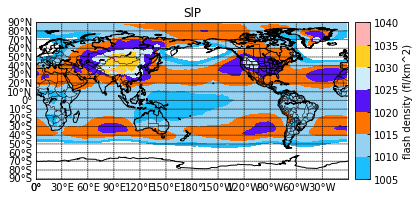

In [69]:
# 先导入所需库
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm, colors


# 获取数据
fh = Dataset('slp.mon.mean.nc')#(meteo_file, mode='r')
# 获取每个变量的值
lon = fh.variables['lon'][:]
lat = fh.variables['lat'][:]
slp = fh.variables['slp'][:]
slp_units = fh.variables['slp'].units
slp_0 = slp[0, ::, ::]


# ncl调色板的配置
fid = open('ncl_default.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[4])
    rgb[i][1]=data[i].split(' ')[6]
    rgb[i][2]=data[i].split(' ')[8]
print((rgb.shape))
#print(rgb[253])
cmap = colors.ListedColormap(rgb)
#print(cmap.N)

L = [90,110,190,9,10,128,157,177,255]
def ncl_color(L,rgb):
    n = len(L)
    colors = np.zeros((n,3))
    #print(n)
    for i in range(n):
        print(L[i],i)
        j = L[i]-2
        colors[i]=rgb[j]
    return colors

cmp = ncl_color(L,rgb)
cmaps = colors.ListedColormap(cmp)

# 设置不等间距 colorbar
levels = [1005,1010,1015,1020,1025,1030,1035,1040]
#norm = colors.BoundaryNorm(levels, cmaps.N)
norm = colors.BoundaryNorm(levels, cmaps.N)

# 绘图
fig,ax = plt.subplots()
m = Basemap(llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)

m.drawcoastlines() # 绘制海岸线
m.drawstates()    # 绘制美国州界
m.drawcountries()  # 绘制国界
# 绘制纬度线
parallels = np.arange(-90.,91,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# 绘制经度线
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# 网格化经纬度，并进行投影转换坐标            
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

# 绘制等值线
#con = m.contourf(x, y, slp_0, cmap = cmaps, norm = norm, levels = levels, spacing = 'uniform')

# 调色板的使用　默认时ncl的调色板
con = m.contourf(x, y, slp_0, cmap = cmaps, norm = norm, levels = levels, spacing = 'uniform')

#con = m.contourf(x, y, slp_0, cmap = index[:], norm = norm, levels = levels, spacing = 'uniform')
# 添加标题
ax.set_title('SlP')

cax = m.colorbar(con, cmap = cmaps, ax = ax, spacing = 'uniform')
cax.set_ticks(levels)
cax.ax.tick_params(direction = 'in')
cax.set_label('flash density (fl/km^2)')

plt.show()

## 尝试画3ｄ地图



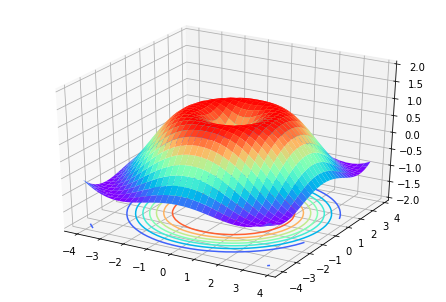

In [5]:
	# -*- coding: utf-8 -*-
# author:           inspurer(月小水长)
# pc_type           lenovo
# create_date:      2019/1/23
# file_name:        3DTest
# github            https://github.com/inspurer
# qq_mail           2391527690@qq.com

# -*- coding: utf-8 -*-
"""
绘制3d图形
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# 定义figure
fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig)

#ax = fig.add_subplot(111, projection='3d')

# 定义x, y
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算每个点对的长度
R = np.sqrt(X ** 2 + Y ** 2)
# 计算Z轴的高度
Z = np.sin(R)

# 绘制3D曲面


# rstride:行之间的跨度  cstride:列之间的跨度
# rcount:设置间隔个数，默认50个，ccount:列的间隔个数  不能与上面两个参数同时出现


# cmap是颜色映射表
# from matplotlib import cm
# ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.coolwarm)
# cmap = "rainbow" 亦可
# 我的理解的 改变cmap参数可以控制三维曲面的颜色组合, 一般我们见到的三维曲面就是 rainbow 的
# 你也可以修改 rainbow 为 coolwarm, 验证我的结论
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影,zdir 可选 'z'|'x'|'y'| 分别表示投影到z,x,y平面
# zdir = 'z', offset = -2 表示投影到z = -2上
ax.contour(X, Y, Z, zdir = 'z', offset = -2, cmap = plt.get_cmap('rainbow'))

# 设置z轴的维度，x,y类似
ax.set_zlim(-2, 2)

plt.show()


## 绘制3d地图的图片

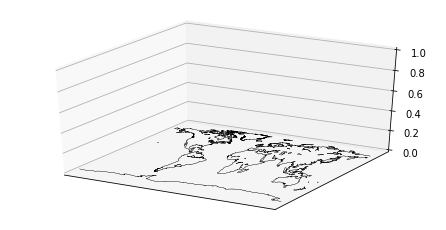

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

map = Basemap()

fig = plt.figure()
ax = Axes3D(fig)

'''
ax.azim = 270
ax.elev = 90
ax.dist = 5
'''

ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))

plt.show()

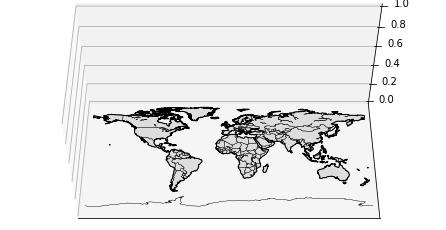

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PolyCollection

map = Basemap()

fig = plt.figure()
ax = Axes3D(fig)

ax.azim = 270
ax.elev = 50
ax.dist = 8

ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))

polys = []
for polygon in map.landpolygons:
    polys.append(polygon.get_coords())


lc = PolyCollection(polys, edgecolor='black',
                    facecolor='#DDDDDD', closed=False)

ax.add_collection3d(lc)


plt.show()


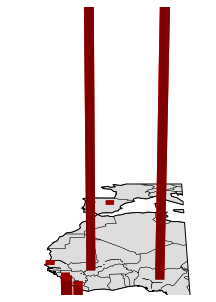

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PolyCollection
import numpy as np

map = Basemap(llcrnrlon=-20,llcrnrlat=0,urcrnrlon=15,urcrnrlat=50,)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_axis_off()
ax.azim = 270
ax.dist = 7

polys = []
for polygon in map.landpolygons:
    polys.append(polygon.get_coords())


lc = PolyCollection(polys, edgecolor='black',
                    facecolor='#DDDDDD', closed=False)

ax.add_collection3d(lc)
ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))

lons = np.array([-13.7, -10.8, -13.2, -96.8, -7.99, 7.5, -17.3, -3.7])
lats = np.array([9.6, 6.3, 8.5, 32.7, 12.5, 8.9, 14.7, 40.39])
cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

ax.bar3d(x, y, np.zeros(len(x)), 2, 2, deaths, color= 'r', alpha=0.8)

plt.show()

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


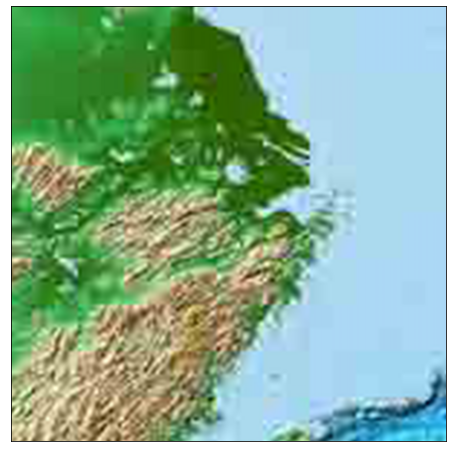

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=115,llcrnrlat=25,urcrnrlon=125,urcrnrlat=35)

m.etopo(scale=5, alpha=10)
